In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input



**The data is divided into train and test folders. The train folder has subfolders named after the classes, and each subfolder contains the images. We just need to split the train data into train + validation data.**

In [3]:
train_dir = '/kaggle/input/state-farm-distracted-driver-detection/imgs/train'

In [64]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2 
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    subset='training'  
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    subset='validation'  
)

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


# > **Let's try a NN made up of dense layers only**

In [41]:
model = Sequential()
model.add(Flatten(input_shape=(150, 150, 3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))  

model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 67500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 512)            │    34,560,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,735,402 (132.51 MB)

 Trainable params: 34,735,402 (132.51 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history = model.fit(
      train_generator,
      steps_per_epoch = 17943 // 64,   #no of samples//batch_size
      epochs = 10,
      validation_data = validation_generator,
      validation_steps = 50)

Epoch 1/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 148s 517ms/step - accuracy: 0.3004 - loss: 1.9549 - val_accuracy: 0.7050 - val_loss: 0.9582
Epoch 2/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7188 - loss: 0.4991 - val_accuracy: 0.6862 - val_loss: 0.9067
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 191s 499ms/step - accuracy: 0.7880 - loss: 0.7442 - val_accuracy: 0.8969 - val_loss: 0.3956
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.9688 - loss: 0.1582 - val_accuracy: 0.8970 - val_loss: 0.4247
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 198s 509ms/step - accuracy: 0.9281 - loss: 0.3068 - val_accuracy: 0.9209 - val_loss: 0.2816
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9219 - loss: 0.1352 - val_accuracy: 0.9493 - val_loss: 0.2106
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 148s 521ms/step - accuracy: 0.9516 - loss: 0.1939 - val_accuracy: 0.9678 - val_loss: 0.1428
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9844 - loss: 0.052

# > **Let's try CNN**

In [71]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [72]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 4624)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 128)            │       592,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 618,170 (2.36 MB)

 Trainable params: 618,170 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
history = model.fit(
      train_generator,
      steps_per_epoch = 17943 // 64,   #no of samples//batch_size
      epochs = 20,
      validation_data = validation_generator,
      validation_steps = 50)

Epoch 1/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 483s 2s/step - accuracy: 0.3000 - loss: 1.9827 - val_accuracy: 0.8100 - val_loss: 0.6859
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 17s 56ms/step - accuracy: 0.8125 - loss: 0.3082 - val_accuracy: 0.7994 - val_loss: 0.6168
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 498s 2s/step - accuracy: 0.8571 - loss: 0.5137 - val_accuracy: 0.9400 - val_loss: 0.2483
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.8750 - loss: 0.1594 - val_accuracy: 0.9422 - val_loss: 0.2092
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 537s 2s/step - accuracy: 0.9543 - loss: 0.1827 - val_accuracy: 0.9522 - val_loss: 0.1749
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9844 - loss: 0.1084 - val_accuracy: 0.9454 - val_loss: 0.1660
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 490s 2s/step - accuracy: 0.9705 - loss: 0.1104 - val_accuracy: 0.9741 - val_loss: 0.1136
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.9844 - loss: 0.0318 - val_

In [74]:
val_acc = history.history['val_accuracy']
print("Validation Accuracy:", val_acc[-1])

Validation Accuracy: 0.9875097870826721


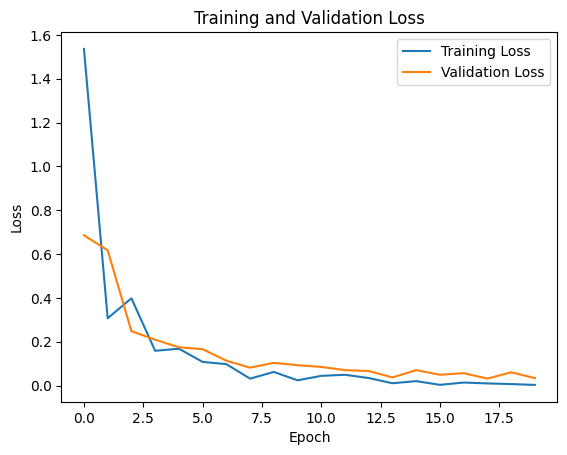

In [77]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# > **Let's try data augmentation and transfer learning**

In [4]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2 
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    subset='training'  
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical',
    subset='validation'  
)

Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


In [5]:
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
resnet_model.trainable = False

for layer in resnet_model.layers:
    layer.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
model = Sequential()
model.add(resnet_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [7]:
history = model.fit(
      train_generator,
      steps_per_epoch = 17943 // 64,   #no of samples//batch_size
      epochs = 10,
      validation_data = validation_generator,
      validation_steps = 50)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/280 ━━━━━━━━━━━━━━━━━━━━ 1:51:35 24s/step - accuracy: 0.0938 - loss: 4.0274

I0000 00:00:1712628991.042230     102 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712628991.092306     102 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 787ms/step - accuracy: 0.4243 - loss: 1.8145

W0000 00:00:1712629217.184292     102 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


280/280 ━━━━━━━━━━━━━━━━━━━━ 288s 946ms/step - accuracy: 0.4250 - loss: 1.8120 - val_accuracy: 0.8459 - val_loss: 0.4855
Epoch 2/10
  1/280 ━━━━━━━━━━━━━━━━━━━━ 33s 122ms/step - accuracy: 0.8438 - loss: 0.5483

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


280/280 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - accuracy: 0.8438 - loss: 0.5483 - val_accuracy: 0.8509 - val_loss: 0.4638
Epoch 3/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 178s 623ms/step - accuracy: 0.8674 - loss: 0.4048 - val_accuracy: 0.9013 - val_loss: 0.3130
Epoch 4/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.9375 - loss: 0.2535 - val_accuracy: 0.9141 - val_loss: 0.2818
Epoch 5/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 176s 615ms/step - accuracy: 0.9139 - loss: 0.2681 - val_accuracy: 0.9297 - val_loss: 0.2241
Epoch 6/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.9219 - loss: 0.2836 - val_accuracy: 0.9336 - val_loss: 0.2093
Epoch 7/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 174s 608ms/step - accuracy: 0.9379 - loss: 0.1964 - val_accuracy: 0.9413 - val_loss: 0.1842
Epoch 8/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.9375 - loss: 0.1843 - val_accuracy: 0.9383 - val_loss: 0.1704
Epoch 9/10
280/280 ━━━━━━━━━━━━━━━━━━━━ 174s 608ms/step - accuracy: 0.9497 - loss: 0.1651 - val

In [8]:
val_acc = history.history['val_accuracy']
print("Validation Accuracy:", val_acc[-1])

Validation Accuracy: 0.9453551769256592


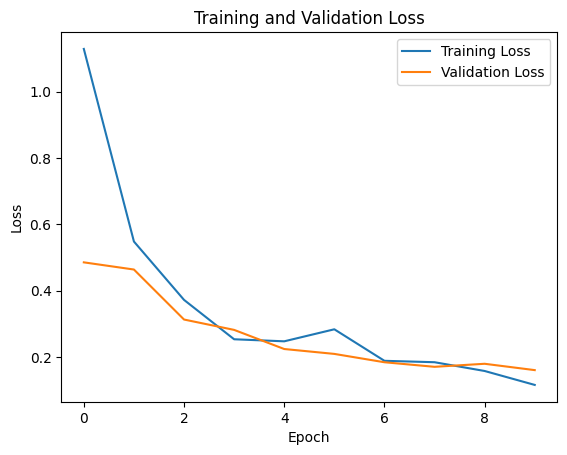

In [9]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# **Summary**:
# Dense layers with 10 epochs validation accuracy: 96%
# CNN with 20 epochs validation accuracy: 98%
# Data augmentation and transfer learning with 10 epochs validation accuracy: 94%